In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 



In [15]:
!pip install scikit-learn

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 215.7 kB/s eta 0:00:001m209.5 kB/s eta 0:00:02
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 169.0 kB/s eta 0:00:00m eta 0:00:010:00:07
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]


In [5]:
df = pd.read_csv('plots/till_45.csv')

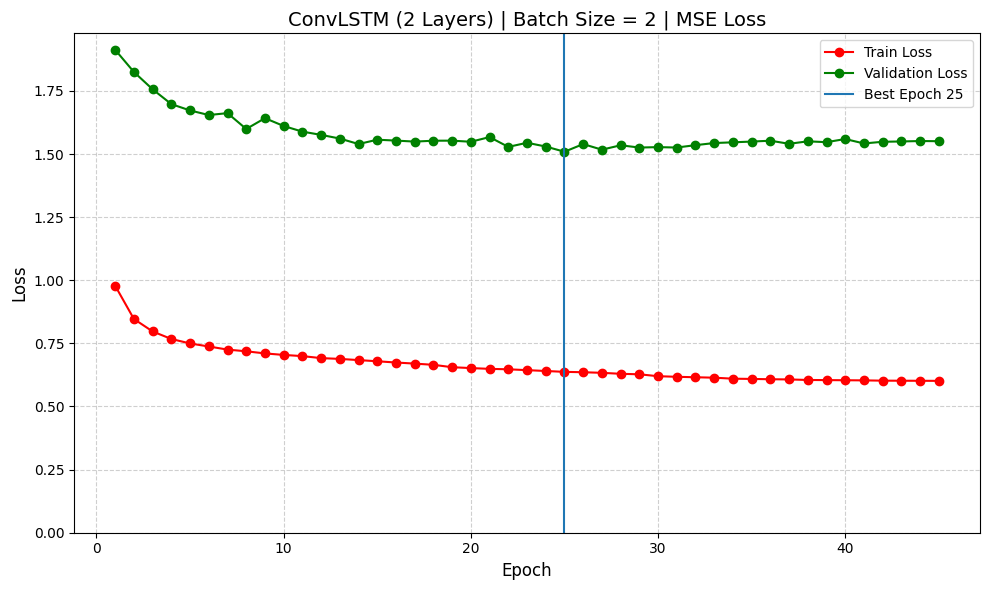

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_loss'], 'r-o', label='Train Loss')
plt.plot(df['epoch'], df['val_loss'], 'g-o', label='Validation Loss')
plt.axvline(df[df['val_loss'] == df['val_loss'].min()]['epoch'].values, label=f"Best Epoch {df[df['val_loss'] == df['val_loss'].min()]['epoch'].values[0]}")
plt.title("ConvLSTM (2 Layers) | Batch Size = 2 | MSE Loss", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

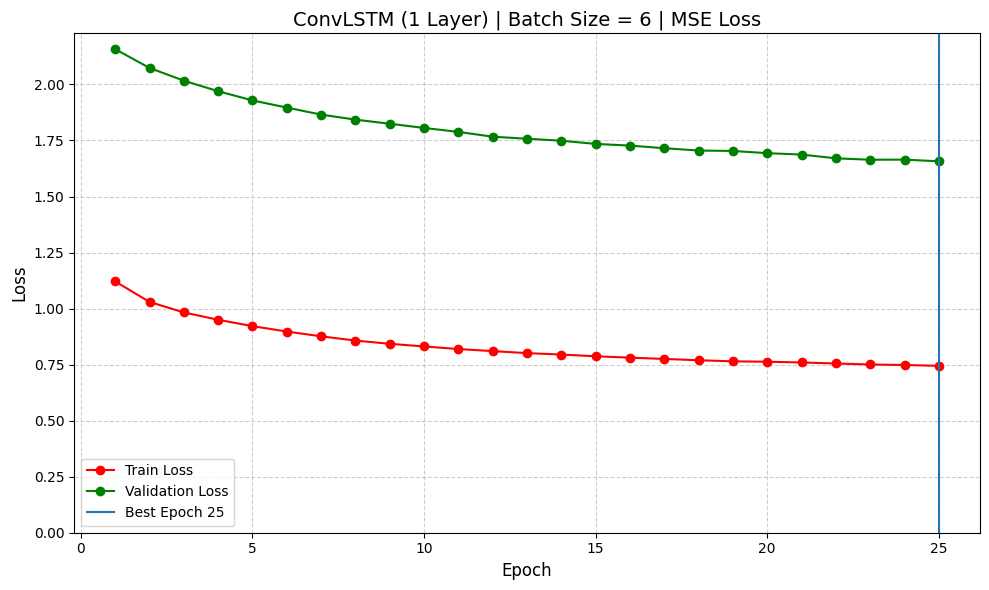

In [11]:

df = pd.read_csv('plots/ConvLSTM_till_25.csv')
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_loss'], 'r-o', label='Train Loss')
plt.plot(df['epoch'], df['val_loss'], 'g-o', label='Validation Loss')
plt.axvline(df[df['val_loss'] == df['val_loss'].min()]['epoch'].values, label=f"Best Epoch {df[df['val_loss'] == df['val_loss'].min()]['epoch'].values[0]}")
plt.title("ConvLSTM (1 Layer) | Batch Size = 6 | MSE Loss", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

In [5]:
from datasets.fire_dataset import test_loader

In [6]:
import torch
from models.CONVLSTM import ConvLSTM2Layers
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np 

device = "cuda" if torch.cuda.is_available() else "cpu"
model_2_layer = ConvLSTM2Layers().to(device) 
model_2_layer.load_state_dict(torch.load("saved_models/ConvLSTM2Layers_25_checkpoint.pt", map_location=device)["model"])
model_2_layer.eval()

y_trues_2 = []
y_preds_2 = []
with torch.no_grad(): 
    for X, Y in test_loader:
        X, Y = X.to(device), Y.to(device) 
        Y_pred = model_2_layer(X) 

        y_trues_2.append(Y.cpu().numpy().flatten())
        y_preds_2.append(Y_pred.cpu().numpy().flatten())

y_trues_2 = np.concatenate(y_trues_2) 
y_preds_2 = np.concatenate(y_preds_2)

mae = mean_absolute_error(y_trues_2, y_preds_2)
r2 = r2_score(y_trues_2, y_preds_2)

In [6]:
from models.CONVLSTM import ConvLSTM
import torch
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np 

device = "cuda" if torch.cuda.is_available() else "cpu"
model_1_layer = ConvLSTM().to(device) 
model_1_layer.load_state_dict(torch.load("saved_models/ConvLSTM_25_checkpoint.pt", map_location=device)["model"])
model_1_layer.eval()

y_trues = []
y_preds = []
with torch.no_grad(): 
    for X, Y in test_loader:
        X, Y = X.to(device), Y.to(device) 
        Y_pred = model_1_layer(X) 

        y_trues.append(Y.cpu().numpy().flatten())
        y_preds.append(Y_pred.cpu().numpy().flatten())

y_trues = np.concatenate(y_trues) 
y_preds = np.concatenate(y_preds)

mae_1_layer = mean_absolute_error(y_trues, y_preds)
r2_1_layer = r2_score(y_trues, y_preds)

In [7]:
from sklearn.metrics import root_mean_squared_error
rmse_2_layer = root_mean_squared_error(y_trues_2, y_preds_2)
rmse_1_layer = root_mean_squared_error(y_trues, y_preds)

In [8]:
rmse_1_layer, rmse_2_layer

(0.774581253528595, 0.7561613917350769)

In [4]:
r2_1_layer, r2

(0.35073941946029663, 0.3812516927719116)

In [5]:
mae_1_layer, mae

(0.05268855765461922, 0.05454064533114433)

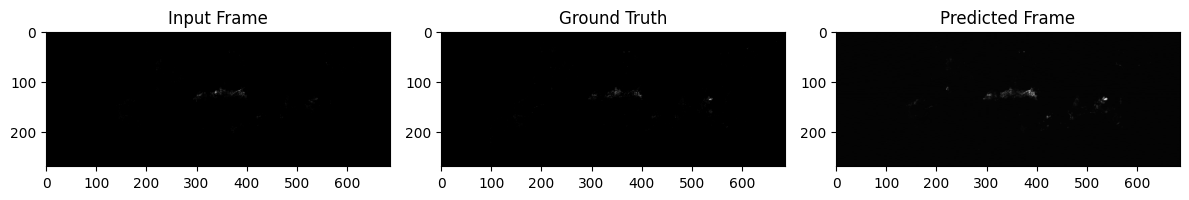

In [36]:
import torch
import matplotlib.pyplot as plt

# Set model to eval mode
model_1_layer.eval()

# Get a single batch
X_batch, Y_batch = next(iter(test_loader))
X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)

# Run prediction
with torch.no_grad():
    Y_pred = model_1_layer(X_batch)

# Move to CPU for plotting
X_batch = X_batch.cpu().numpy()
Y_batch = Y_batch.cpu().numpy()
Y_pred = Y_pred.cpu().numpy()

# Select one sample (for example, the first in the batch)
idx = 0
X_sample = X_batch[idx]
Y_true_sample = Y_batch[idx]
Y_pred_sample = Y_pred[idx]

# --- Depending on your data format ---
# ConvLSTM usually outputs shape: [batch, seq_len, channels, height, width]
# Adjust visualization accordingly

timestep = 0  # choose which frame to view if it's a sequence
plt.figure(figsize=(12, 5))

# Input frame
plt.subplot(1, 3, 1)
plt.imshow(X_sample[timestep,0], cmap='gray')
plt.title("Input Frame")

# Ground Truth
plt.subplot(1, 3, 2)
plt.imshow(Y_true_sample.squeeze(), cmap='gray')
plt.title("Ground Truth")

# Predicted Frame
plt.subplot(1, 3, 3)
plt.imshow(Y_pred_sample.squeeze(), cmap='gray')
plt.title("Predicted Frame")

plt.tight_layout()
plt.show()

Input shape: (7, 1, 269, 687)
Ground Truth shape: (1, 269, 687)
Prediction shape: (1, 269, 687)


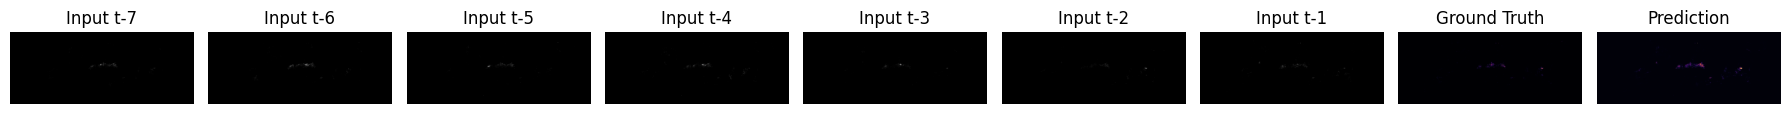

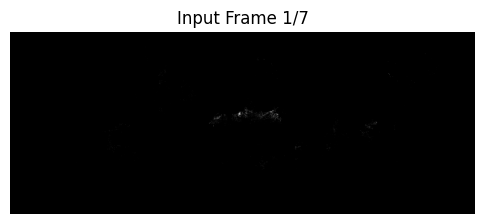

In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Put model in eval mode
model_1_layer.eval()

# Take one batch
X_batch, Y_batch = next(iter(test_loader))
X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)

# Predict
with torch.no_grad():
    Y_pred = model_1_layer(X_batch)

# Move to CPU and convert to numpy
X_batch = X_batch.cpu().numpy()
Y_batch = Y_batch.cpu().numpy()
Y_pred = Y_pred.cpu().numpy()

# Select one sample from the batch
idx = 0
X_sample = X_batch[idx]        # (7, 1, 269, 687)
Y_true_sample = Y_batch[idx]   # (1, 269, 687)
Y_pred_sample = Y_pred[idx]    # (1, 269, 687)

print("Input shape:", X_sample.shape)
print("Ground Truth shape:", Y_true_sample.shape)
print("Prediction shape:", Y_pred_sample.shape)

# --- Static Visualization (7 input frames + GT + Pred) ---

fig, axes = plt.subplots(1, X_sample.shape[0] + 2, figsize=(18, 4))

# Input sequence frames
for i in range(X_sample.shape[0]):
    axes[i].imshow(X_sample[i, 0], cmap='gray')
    axes[i].set_title(f"Input t-{X_sample.shape[0]-i}")
    axes[i].axis('off')

# Ground truth
axes[-2].imshow(Y_true_sample[0], cmap='inferno')
axes[-2].set_title("Ground Truth")
axes[-2].axis('off')

# Prediction
axes[-1].imshow(Y_pred_sample[0], cmap='inferno')
axes[-1].set_title("Prediction")
axes[-1].axis('off')

plt.tight_layout()
plt.show()

# --- Optional: Animate input sequence only ---
# If you want to see how input frames evolve

fig2, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(X_sample[0, 0], cmap='gray')
ax.set_title("Input Sequence (Past Frames)")
ax.axis('off')

def update(frame):
    im.set_array(X_sample[frame, 0])
    ax.set_title(f"Input Frame {frame+1}/{X_sample.shape[0]}")
    return [im]

anim = FuncAnimation(fig2, update, frames=X_sample.shape[0], interval=400, blit=True)
plt.show()


In [28]:
df_2020 = pd.read_csv('../datasets/global_modis/final_2020_by_day.csv')

In [30]:
!pip install cartopy

  Using cached pyshp-3.0.2.post1-py3-none-any.whl.metadata (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 195.3 kB/s eta 0:00:000:00:020:00:03:07
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 203.7 kB/s eta 0:00:00m eta 0:00:010:02:08
Using cached pyshp-3.0.2.post1-py3-none-any.whl (58 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 256.0 kB/s eta 0:00:00 kB/s eta 0:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [cartopy]━━━ 3/4 [cartopy]


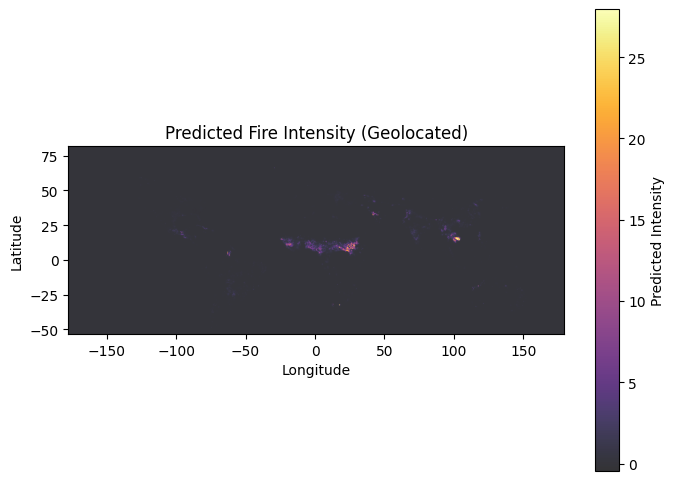

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
min_lon, max_lon, min_lat, max_lat = df_2020['long_bin'].min(), df_2020['long_bin'].max(), df_2020['lat_bin'].min(), df_2020['lat_bin'].max()
# extent = [min_lon, max_lon, min_lat, max_lat]
im = ax.imshow(
    Y_pred_sample[0], 
    cmap='inferno', 
    extent=[min_lon, max_lon, min_lat, max_lat],
    origin='lower',
    alpha=0.8
)

# Overlay coastlines or region boundaries if you have shapefiles
ax.set_title("Predicted Fire Intensity (Geolocated)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.colorbar(im, ax=ax, label="Predicted Intensity")
plt.show()

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

model_1_layer.eval()

# Take one batch
X_batch, Y_batch = next(iter(test_loader))
X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)

# Choose one sample
X_input = X_batch[0:1]  # keep batch dim
num_future_days = 7

predictions = []

with torch.no_grad():
    for day in range(num_future_days):
        # Predict next frame
        Y_pred = model_1_layer(X_input)

        predictions.append(Y_pred.cpu().numpy())

        # Append prediction to the input sequence, remove oldest frame
        # Input shape: (1, seq_len, 1, 269, 687)
        X_input = torch.cat([X_input[:, 1:], Y_pred.unsqueeze(1)], dim=1)

# Combine all predicted frames
Y_future = np.concatenate(predictions, axis=0)  # shape: (num_future_days, 1, 269, 687)
print("Predicted future frames shape:", Y_future.shape)

NameError: name 'model_1_layer' is not defined

In [37]:
X_input = X_batch[0:1]  # keep batch dim
num_future_days = 7

predictions = []

with torch.no_grad():
    for day in range(num_future_days):
        # Predict next frame
        Y_pred = model_1_layer(X_input)

        predictions.append(Y_pred.cpu().numpy())

        # Append prediction to the input sequence, remove oldest frame
        # Input shape: (1, seq_len, 1, 269, 687)
        X_input = torch.cat([X_input[:, 1:], Y_pred.unsqueeze(1)], dim=1)

TypeError: 'int' object is not callable

In [22]:
import pandas as pd
df_2020 = pd.read_csv('../datasets/global_modis/final_2020_by_day.csv')

In [26]:
df_2021 = pd.read_csv('../datasets/global_modis/final_2021_by_day.csv')

In [28]:
df_2024 = pd.read_csv('../datasets/global_modis/final_2024_by_day.csv')

In [32]:
(df_2020['lat_bin'].min(),df_2021['lat_bin'].min(),df_2024['lat_bin'].min())

(np.float64(-53.5), np.float64(-55.0), np.float64(-54.0))

In [37]:
(df_2020['long_bin'].min(),df_2021['long_bin'].min(),df_2024['long_bin'].min())

(np.float64(-177.5), np.float64(-179.0), np.float64(-179.0))

In [64]:
from datasets.fire_dataset import train_loader, val_loader

Predicted future frames shape: (7, 1, 269, 687)


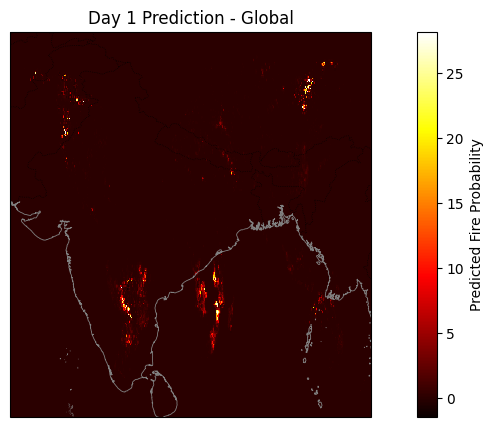

In [68]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ---------------------------
# 1. Model Inference (multi-day prediction)
# ---------------------------
model_1_layer.eval()

# Get one batch of data
X_batch, Y_batch = next(iter(val_loader))
X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)

# Select one sample (keep batch dim)
X_input = X_batch[0:1]  # shape (1, seq_len, 1, H, W)
num_future_days = 7  # how many future predictions you want

predictions = []

with torch.no_grad():
    for day in range(num_future_days):
        Y_pred = model_1_layer(X_input)
        predictions.append(Y_pred.cpu().numpy())
        X_input = torch.cat([X_input[:, 1:], Y_pred.unsqueeze(1)], dim=1)

Y_pred_sample = np.concatenate(predictions, axis=0)  # shape: (num_future_days, 1, H, W)
print("Predicted future frames shape:", Y_pred_sample.shape)

# ---------------------------
# 2. Geographic grid setup
# ---------------------------
# For 0.5° bins, matching H, W with latitude and longitude bins.
# --- after model inference (Y_pred_sample shape: [num_days, 1, H, W]) ---

# --- after model inference (Y_pred_sample shape: [num_days, 1, H, W]) ---

n_lat = Y_pred_sample.shape[2]  # 269
n_lon = Y_pred_sample.shape[3]  # 687
shift_amount = 13  # Adjust this number to tune shift size; positive values shift eastward
# Y_pred_sample = np.roll(Y_pred_sample, shift=shift_amount, axis=-1)
# Calculate edges by linspace over real latitude and longitude ranges covered by your data
# min_lat = min(df_2020['lat_bin'].min(),df_2021['lat_bin'].min(),df_2024['lat_bin'].min())
# max_lat = max(df_2020['lat_bin'].max(),df_2021['lat_bin'].max(),df_2024['lat_bin'].max())
# min_lon = min(df_2020['long_bin'].min(),df_2021['long_bin'].min(),df_2024['long_bin'].min())
# max_lon = max(df_2020['long_bin'].max(),df_2021['long_bin'].max(),df_2024['long_bin'].max())

min_lat, max_lat = 6, 38
min_lon, max_lon = 68, 98

lats_edges = np.linspace(min_lat, max_lat, n_lat+1)  # length 270
lons_edges = np.linspace(min_lon, max_lon, n_lon+1)  # length 688

lon_grid, lat_grid = np.meshgrid(lons_edges, lats_edges)

fig = plt.figure(figsize=(12, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='gray', linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

pcm = ax.pcolormesh(
    lon_grid, lat_grid, Y_pred_sample[0, 0], # Y_pred_sample[frame, 0] shape: (n_lat, n_lon)
    cmap='hot',
    shading='auto',  # Can also use 'flat' if you want to be explicit, but 'auto' is fine here
    transform=ccrs.PlateCarree(),
    alpha=1
)
plt.colorbar(pcm, ax=ax, label='Predicted Fire Probability')
title = ax.set_title("Day 1 Prediction - Global Region")

def update(frame):
    pcm.set_array(Y_pred_sample[frame, 0].ravel())
    title.set_text(f"Day {frame + 1} Prediction - Global")
    return [pcm, title]

anim = FuncAnimation(fig, update, frames=Y_pred_sample.shape[0], interval=500, blit=False)
HTML(anim.to_jshtml())
